In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Load the dataset into dataframe
df = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding='latin1')

In [3]:
# Quick Overview of Dataset
df.head()

City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze

 Feature Descriptions

City: Indicates the host city where the Olympic event was held.
Year: Specifies the year in which the Olympic event took place.
Sport: Represents the primary category or type of sport in which the athlete competed.
Discipline: Refers to the specific subcategory within a broader sport.
Event: Denotes the particular competition or event within a discipline.
Athlete: Contains the full name of the participating athlete.
Gender: Indicates the biological gender (male or female) of the athlete.
Country_code: A standardized three-letter abbreviation representing the athlete’s country.
Country: The full name of the country the athlete represented during the event.
Event_gender: Specifies the gender category of the event (e.g., 'M' for male, 'F' for female).
Medal: Indicates the type of medal (Gold, Silver, or Bronze) awarded to the athlete, if any.

In [4]:
# Get the datatypes of each columns number of records in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [5]:
# number of rows and columns
df.shape

(15433, 11)

In [6]:
# check for nan values in each columns
df.isna().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [7]:
# drop missing values
df.dropna(inplace = True)

In [8]:
# To check number of rows and columns after droping nan values.
# number of rows before removing duplicated row
df.shape

(15316, 11)

In [9]:
# to check duplicate values
df[df.duplicated()]

City    Year   Sport Discipline   Event       Athlete Gender  \
2320  Moscow  1980.0  Hockey     Hockey  hockey  SINGH, Singh    Men   

     Country_Code Country Event_gender Medal  
2320          IND   India            M  Gold

In [10]:
# drop the duplicated rows
df = df.drop_duplicates()

In [11]:
# To check number of rows and columns after droping duplicate values
df.shape

(15315, 11)

To assess redundancy in the dataset, we first examine the Gender and Event_gender columns, as they appear to contain similar information regarding the athlete's gender. Similarly, Country_code seems to be a short-form representation of the Country column, potentially making one of them redundant.

We begin by inspecting the unique values in both Gender and Event_gender to verify whether they convey the same information:


In [12]:
print(df['Event_gender'].unique())
print(df['Gender'].unique())

['W' 'M' 'X']
['Women' 'Men']


If the values are equivalent or highly overlapping, and there is no additional distinction provided by Event_gender, we can safely drop one of them.

Likewise, if Country_code is simply the standardized abbreviation of Country, and the full country name is more informative for analysis, we may choose to retain only the Country column and drop Country_code.

To remove the redundant columns:

In [13]:
df = df.drop(columns = ['Event_gender','Country_Code'])

In [14]:
# to check the dataset after removing the redundant columns
df.head()

City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender        Country   Medal  
0           KÖHLER, Christa  Women   East Germany  Silver  
1       KOSENKOV, Aleksandr    Men   Soviet Union  Bronze  
2      BOGGS, Philip George    Men  United States    Gold  
3  CAGNOTTO, Giorgio Franco    Men          Italy  Silver  
4    WILSON, Deborah Keplar  Women  United States  Bronze

In [15]:
#The Year column is currently of type float. To ensure accurate representation and enable integer-based operations, we will convert its data type to int.
df['Year'] = df['Year'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15315 entries, 0 to 15432
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        15315 non-null  object
 1   Year        15315 non-null  int32 
 2   Sport       15315 non-null  object
 3   Discipline  15315 non-null  object
 4   Event       15315 non-null  object
 5   Athlete     15315 non-null  object
 6   Gender      15315 non-null  object
 7   Country     15315 non-null  object
 8   Medal       15315 non-null  object
dtypes: int32(1), object(8)
memory usage: 1.1+ MB


In [17]:
#Q1	Which city hosted the most Olympics
df.groupby("City")['Year'].unique()

City
Athens         [2004]
Atlanta        [1996]
Barcelona      [1992]
Beijing        [2008]
Los Angeles    [1984]
Montreal       [1976]
Moscow         [1980]
Seoul          [1988]
Sydney         [2000]
Name: Year, dtype: object

From the above code, we observe that after grouping by City and applying the unique() function on the Year column, each city is associated with only one unique year. This indicates that no city hosted the event more than once during the observed time period.

In [18]:
#Q2	Which city hosted the most events.
df.groupby("City")['Event'].nunique().sort_values(ascending = False)

City
Athens         204
Sydney         202
Beijing        201
Atlanta        180
Barcelona      178
Seoul          163
Los Angeles    158
Moscow         146
Montreal       142
Name: Event, dtype: int64

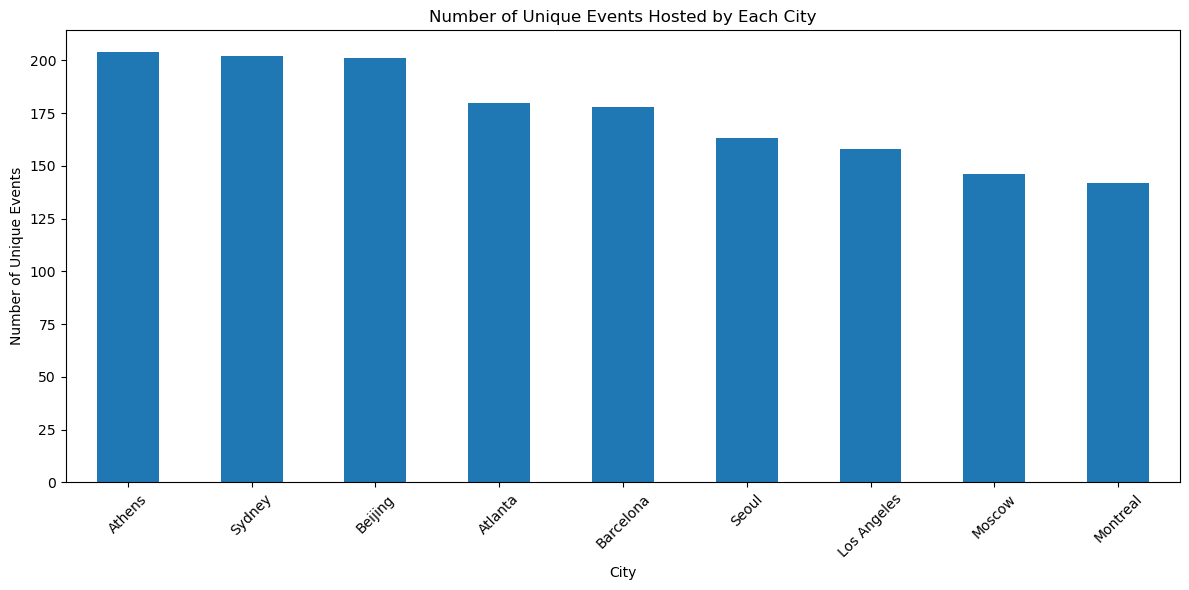

In [19]:

city_event_counts = df.groupby("City")['Event'].nunique()


plt.figure(figsize=(12,6))
city_event_counts.sort_values(ascending=False).plot(kind='bar')  # sorted for better visibility
plt.title("Number of Unique Events Hosted by Each City")
plt.xlabel("City")
plt.ylabel("Number of Unique Events")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the above code, we observe that after grouping by City and applying the nunique() function on the Event column, Athens appears to have hosted the highest number of unique events among all cities

In [20]:
#Q3	Count of unique events by Sport
df.groupby("Sport")['Event'].nunique().sort_values(ascending = False)

Sport
Weightlifting        35
Judo                 32
Wrestling            30
Athletics            30
Aquatics             26
Sailing              20
Cycling              19
Shooting             18
Boxing               17
Rowing               13
Canoe / Kayak        13
Gymnastics           12
Taekwondo             8
Fencing               6
Archery               4
Table Tennis          3
Tennis                2
Modern Pentathlon     2
Badminton             2
Equestrian            2
Volleyball            2
Triathlon             1
Basketball            1
Softball              1
Baseball              1
Handball              1
Football              1
Hockey                1
Name: Event, dtype: int64

In [21]:
city_event_s_counts = df.groupby("Sport")['Event'].nunique()


plt.figure(figsize=(12,6))
city_event_s_counts.sort_values(ascending=False).plot(kind='bar')  # sorted for better visibility
plt.title("Number of Unique Events per Sports")
plt.xlabel("Sport")
plt.ylabel("Number of Unique Events")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Weightlifting, Wrestling, and Judo emerge as the sports with the highest number of unique events based on the grouped analysis.

In [22]:
#Q4	Athlete with most medals
df['Athlete'].value_counts()

Athlete
PHELPS, Michael                  16
TORRES, Dara                     12
THOMPSON, Jenny                  12
NEMOV, Alexei                    12
ANDRIANOV, Nikolay               12
                                 ..
KIM, Soon-Duk                     1
KIRKWOOD, James William           1
LEJEUNE, Elisabeth Anne Marie     1
WOLFF, Ingrid Imelda              1
LOPEZ, Mijain                     1
Name: count, Length: 11337, dtype: int64

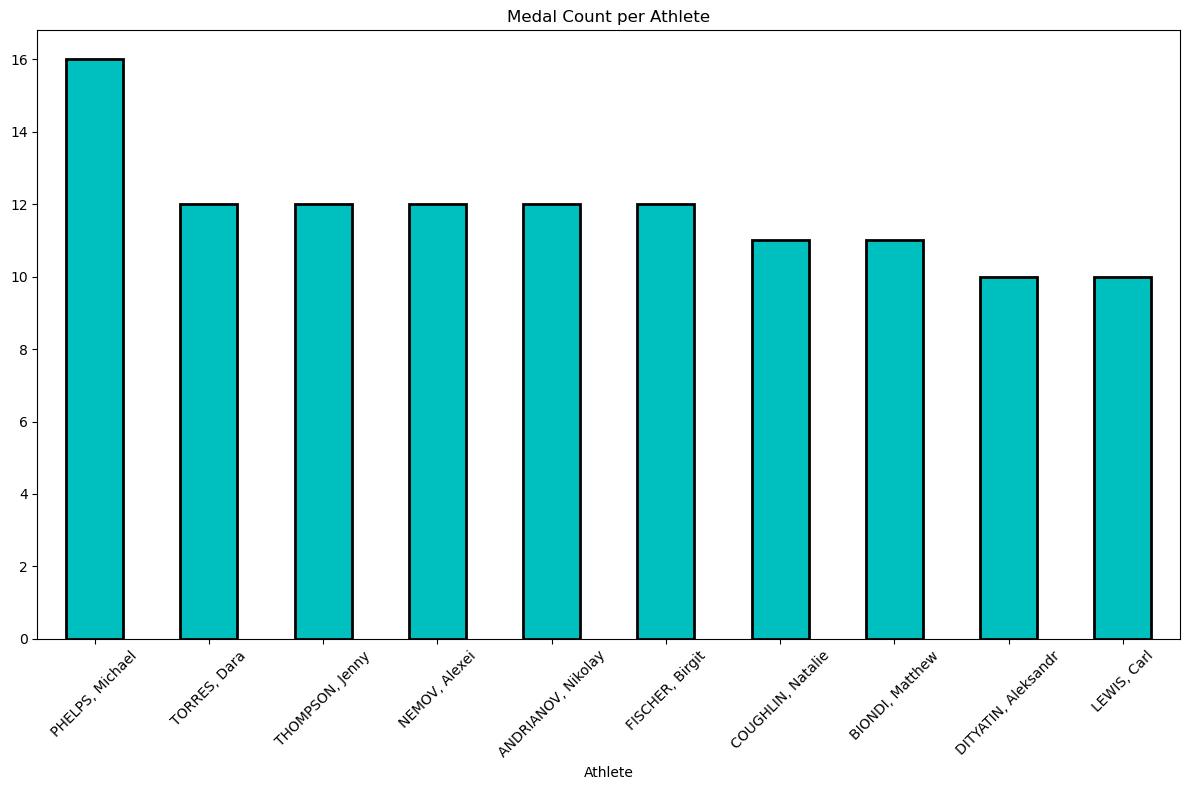

In [23]:
plt.figure(figsize = (12,8))
df['Athlete'].value_counts().nlargest(10).sort_values(ascending=False).plot(kind = 'bar',color = 'c', edgecolor = 'black',linewidth = 2)
plt.title("Medal Count per Athlete")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

PHELPS, Michael stands out as the athlete with the highest medal count, as shown in the chart above.

In [24]:
#Q5	Gender distribution in medals
df.groupby("Gender")["Medal"].value_counts()

Gender  Medal 
Men     Bronze    3257
        Gold      3079
        Silver    3051
Women   Bronze    2001
        Silver    1965
        Gold      1962
Name: count, dtype: int64

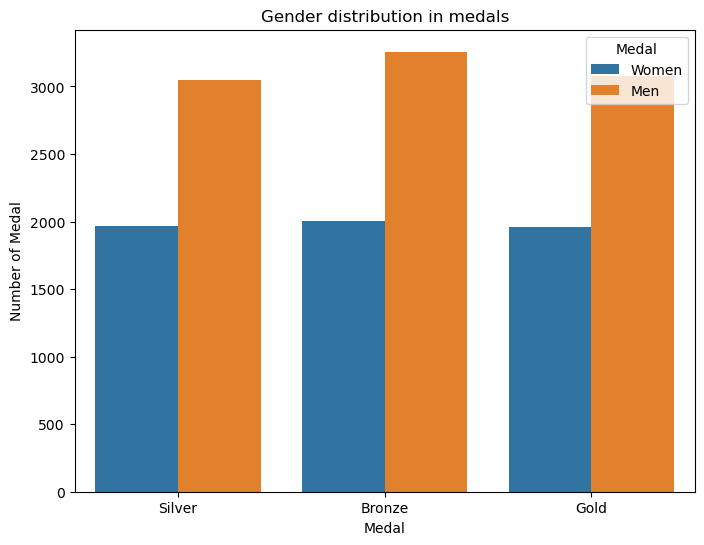

In [25]:
plt.figure(figsize = (8,6))
sns.countplot(data = df,x = "Medal", hue = 'Gender')
plt.title("Gender distribution in medals")
plt.xlabel("Medal")
plt.ylabel("Number of Medal")
plt.legend(title = "Medal")
plt.show()

In [26]:
df.groupby("Gender")["Medal"].count()

Gender
Men      9387
Women    5928
Name: Medal, dtype: int64

In [27]:
df["Gender"].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title("Gender Distribution in Medal")
plt.show()

The data clearly indicates that male athletes have secured a significantly higher number of medals compared to their female counterparts, highlighting a gender disparity in medal distribution

In [28]:
#Q6	Country-wise medal count by year

from IPython.display  import display

medals_by_year_country = df.groupby(['Year', 'Country'])['Medal'].count().reset_index(name='Medal_Count')

# Pivot for year-wise medal distribution per country

medals_pivot = medals_by_year_country.pivot(index='Year', columns='Country', values='Medal_Count').fillna(0).astype(int)
display(medals_pivot)


Country  Afghanistan  Algeria  Argentina  Armenia  Australia  Austria  \
Year                                                                    
1976               0        0          0        0         24        1   
1980               0        0          0        0         12        5   
1984               0        2          0        0         50        3   
1988               0        0         13        0         34        1   
1992               0        2          2        0         57        6   
1996               0        3         20        2        132        3   
2000               0        5         20        1        183        4   
2004               0        0         47        0        157        8   
2008               1        2         51        6        149        3   

Country  Azerbaijan  Bahamas  Barbados  Belarus  ...  United States  Uruguay  \
Year                                             ...                           
1976              0        0         0        0  ...            155        0   
1980              0        0         0        0  ...              0        0   
1984              0        0         0        0  ...            333        0   
1988              0        0         0        0  ...            193        0   
1992              0        1         0        0  ...            224        0   
1996              1        5         0       23  ...            260        0   
2000              3        6         1       22  ...            248        1   
2004              5        2         0       17  ...            264        0   
2008              7        5         0       30  ...            315        0   

Country  Uzbekistan  Venezuela  Vietnam  Virgin Islands*  West Germany  \
Year                                                                     
1976              0          1        0                0            75   
1980              0          1        0                0             0   
1984              0          3        0                0           157   
1988              0          0        0                1           113   
1992              0          0        0                0             0   
1996              2          0        0                0             0   
2000              4          0        1                0             0   
2004              5          2        0                0             0   
2008              6          1        1                0             0   

Country  Yugoslavia  Zambia  Zimbabwe  
Year                                   
1976             19       0         0  
1980             57       0        16  
1984             87       1         0  
1988             63       0         0  
1992              0       0         0  
1996             26       1         0  
2000             26       0         0  
2004              0       0         3  
2008              0       0         4  

[9 rows x 127 columns]

In [29]:
#Q7	Dominating country by sport
df_top = df.groupby(["Country","Sport"])["Medal"].count().sort_values(ascending = False).reset_index(name = 'count')

In [30]:
df_top_sport = df_top.groupby("Sport").first().reset_index()

In [31]:
df_top_sport

Sport        Country  count
0            Aquatics  United States    578
1             Archery   Korea, South     52
2           Athletics  United States    299
3           Badminton          China     47
4            Baseball           Cuba    111
5          Basketball  United States    192
6              Boxing           Cuba     56
7       Canoe / Kayak        Germany     96
8             Cycling      Australia     54
9          Equestrian  United States     73
10            Fencing         France    115
11           Football         Brazil    109
12         Gymnastics        Romania    116
13           Handball   Korea, South     96
14             Hockey    Netherlands    159
15               Judo          Japan     57
16  Modern Pentathlon        Hungary     15
17             Rowing        Romania    156
18            Sailing  United States     64
19           Shooting          China     42
20           Softball      Australia     60
21       Table Tennis          China     61
22          Taekwondo   Korea, South     12
23             Tennis  United States     24
24          Triathlon      Australia      4
25         Volleyball         Brazil    102
26      Weightlifting          China     43
27          Wrestling  United States     57

In [32]:
#Q8	Athletes who switched sports
df_switched = df.groupby(['Athlete'])['Sport'].nunique().reset_index(name = 'count')
df_switched[df_switched['count']>1]

Athlete  count
735           BELOVA, Irina      2
1513             CHEN, Jing      2
2198       DIMITROV, Stefan      2
3104         GAVRILOV, Yuri      2
3315         GONZALEZ, Raul      2
5036    KOLESNIKOV, Nikolai      2
5166         KOVACS, Istvan      2
5172   KOVALENKO, Alexandre      2
5363     KUZNETSOV, Mikhail      2
5364     KUZNETSOV, Nikolai      2
5547         LEE, Eun Kyung      2
5700                 LI, Na      2
5708               LI, Ting      2
7426    OVCHINNIKOVA, Elena      2
8417        ROMERO, Rebecca      2
9888      THOMPSON, Richard      2
9979            TOMA, Sanda      2
10600          WANG, Liping      2
10697        WELLS, Matthew      2
10996             YANG, Wei      2
11077            YOUNG, Tim      2

In [33]:
#Q9	Year-wise top 5 countries (combined view)
df_top_five = df.groupby(["Year","Country"])["Medal"].count().reset_index(name = 'count')
df_top_five_sort = df_top_five.sort_values(['Year','count'],ascending = False)
df_top_five_sort.groupby('Year').head(5)

Year        Country  count
554  2008  United States    315
488  2008          China    184
477  2008      Australia    149
535  2008         Russia    143
502  2008        Germany    101
469  2004  United States    264
453  2004         Russia    192
400  2004      Australia    157
425  2004        Germany    149
433  2004          Italy    102
394  2000  United States    248
379  2000         Russia    188
322  2000      Australia    183
346  2000        Germany    119
334  2000          China     79
315  1996  United States    260
243  1996      Australia    132
264  1996        Germany    124
298  1996         Russia    115
253  1996          China    110
239  1992  United States    224
237  1992   Unified team    223
195  1992        Germany    198
185  1992          China     83
188  1992           Cuba     71
164  1988   Soviet Union    294
172  1988  United States    193
138  1988   East Germany    174
174  1988   West Germany    113
149  1988   Korea, South     77
119  1984  United States    333
121  1984   West Germany    157
110  1984        Romania    106
122  1984     Yugoslavia     87
83   1984         Canada     86
67   1980   Soviet Union    442
49   1980   East Germany    260
45   1980       Bulgaria     94
66   1980        Romania     72
55   1980        Hungary     61
30   1976   Soviet Union    285
10   1976   East Germany    192
37   1976  United States    155
39   1976   West Germany     75
26   1976         Poland     73

In [37]:
#Q10 Which sport had the highest number of Gold medals awarded?
df_gold = df.groupby("Sport")['Medal'].value_counts().sort_values(ascending = False).reset_index(name = 'count')

In [38]:
exact_df = df_gold[df_gold['Medal']== "Gold"]
exact_df 

Sport Medal  count
0            Aquatics  Gold    757
5           Athletics  Gold    504
7              Rowing  Gold    459
10             Hockey  Gold    272
12         Gymnastics  Gold    266
16           Handball  Gold    256
19         Volleyball  Gold    232
23      Canoe / Kayak  Gold    224
26           Football  Gold    219
27         Basketball  Gold    216
31            Fencing  Gold    203
36          Wrestling  Gold    172
38            Cycling  Gold    162
41         Equestrian  Gold    144
44            Sailing  Gold    139
47           Shooting  Gold    115
52           Baseball  Gold    111
53      Weightlifting  Gold    104
54             Boxing  Gold    104
59               Judo  Gold     99
61           Softball  Gold     60
65            Archery  Gold     54
70          Badminton  Gold     38
72       Table Tennis  Gold     38
73             Tennis  Gold     36
77  Modern Pentathlon  Gold     27
80          Taekwondo  Gold     24
82          Triathlon  Gold      6

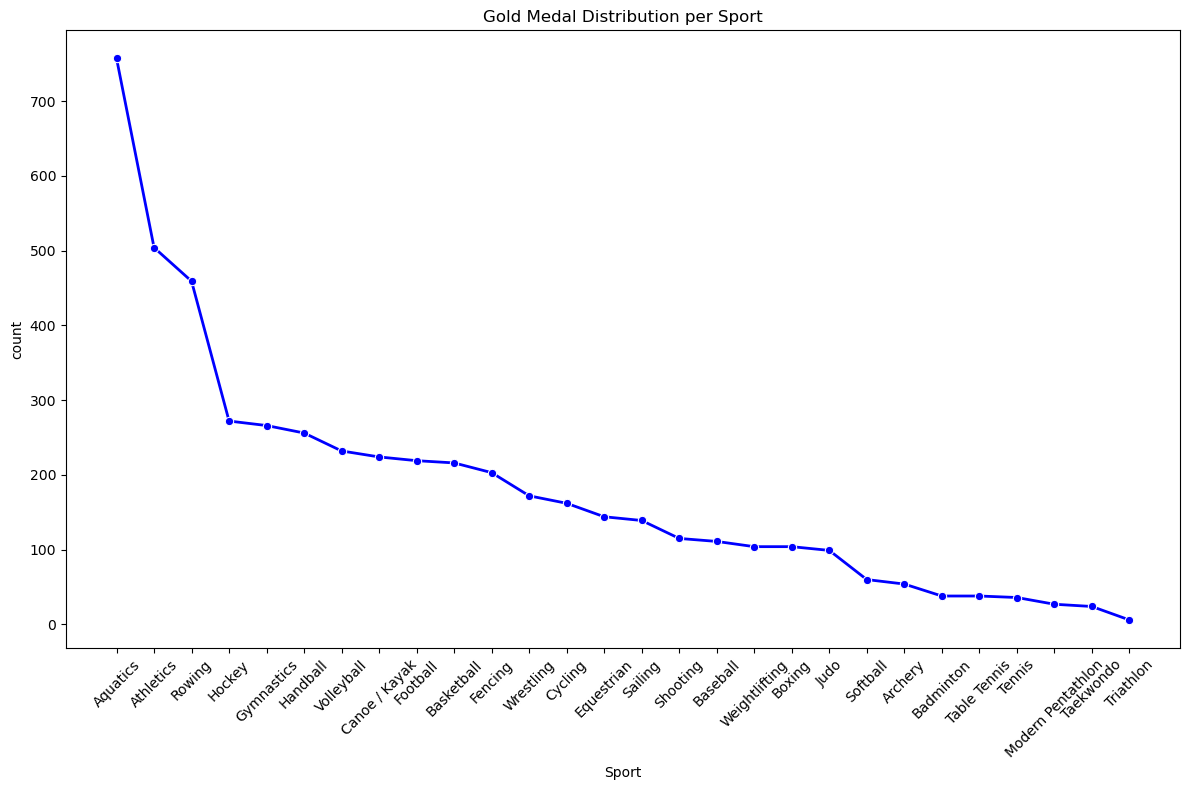

In [40]:
plt.figure(figsize = (12,8))
sns.lineplot(data = exact_df,x = 'Sport', y = 'count',color = 'blue' ,marker='o' , linestyle= '-',linewidth = 2)
plt.title("Gold Medal Distribution per Sport")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In Sport Aquatics has highest number of Gold followed by Athletics and Rowing

In [44]:
df_switched_name = df.groupby(['Athlete'])['Sport'].value_counts().reset_index(name = 'count')
df_switched_name[df_switched_name['count']>1]

Athlete       Sport  count
16      ABBAGNALE, Agostino      Rowing      3
17       ABBAGNALE, Carmine      Rowing      3
18      ABBAGNALE, Giuseppe      Rowing      3
26        ABDULLAYEV, Namig   Wrestling      2
33       ABEYLEGESSE, Elvan   Athletics      2
...                     ...         ...    ...
11335  ZUKAUSKAS, Eurelijus  Basketball      2
11342       ZVEREVA, Ellina   Athletics      2
11349       ZWERVER, Ronald  Volleyball      2
11352   ZWOLLE, Hendrik Jan      Rowing      2
11354        ZYKINA, Olesya   Athletics      2

[2558 rows x 3 columns]

In [69]:
#Q12 How many different countries participated each year?
df_trend = df.groupby(["Year"])["Country"].nunique().reset_index(name = 'count')
df_trend

Year  count
0  1976     41
1  1980     36
2  1984     47
3  1988     52
4  1992     64
5  1996     79
6  2000     80
7  2004     74
8  2008     86

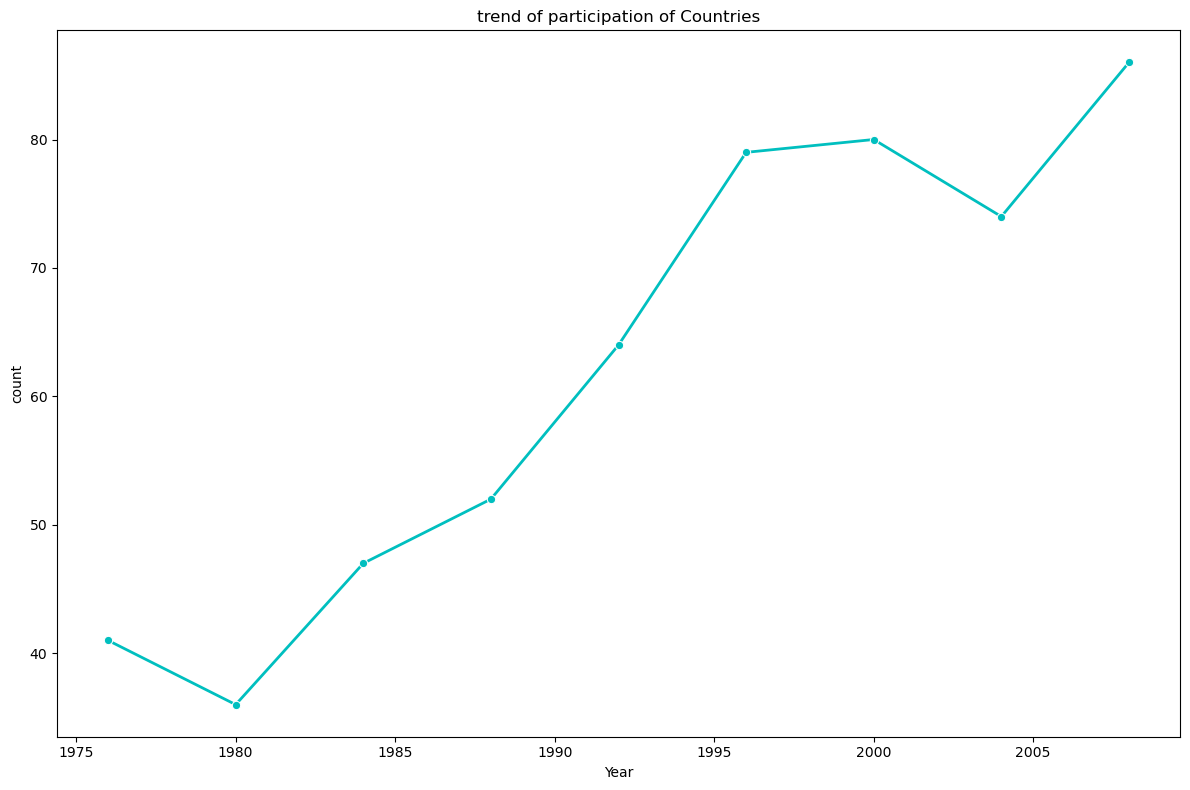

In [70]:
plt.figure(figsize = (12,8))
sns.lineplot(data = df_trend, x = 'Year', y = 'count',color = 'c' ,marker='o' , linestyle= '-',linewidth = 2)
plt.title("trend of participation of Countries")
plt.tight_layout()
plt.show()

Participation steadily increased over the years, with the number of countries growing from approximately 40 in 1976 to over 80 by 2008, indicating broader global engagement.

In [89]:
#Q13 Average number of medals per athlete per country
df_athlete = df.groupby("Country")["Athlete"].nunique()
df_medals = df.groupby("Country")['Medal'].count()
df_avg_medal = (df_medals/df_athlete).sort_values(ascending=False)

In [90]:
df_avg_medal.head(10)

Country
Namibia                4.000000
Ecuador                2.000000
Costa Rica             2.000000
Suriname               2.000000
Mozambique             2.000000
Slovakia               1.812500
Jamaica                1.711538
Ethiopia               1.684211
Romania                1.590759
Trinidad and Tobago    1.571429
dtype: float64

In [98]:
#Q14 Most dominant athlete in each sport
df_top_sport = df.groupby(['Sport','Athlete'])['Medal'].count().sort_values(ascending=False)
df_top_sport.groupby('Sport').head(1)

Sport              Athlete                       
Aquatics           PHELPS, Michael                   16
Gymnastics         NEMOV, Alexei                     12
Canoe / Kayak      FISCHER, Birgit                   12
Athletics          LEWIS, Carl                       10
Rowing             LIPA, Elisabeta                    8
Equestrian         VAN GRUNSVEN, Anky                 8
Fencing            TRILLINI, Giovanna                 8
Archery            KIM, Soo-Nyung                     6
Cycling            ZIJLAARD-VAN MOORSEL, Leontien     6
Shooting           WANG, Yifu                         6
Modern Pentathlon  MASSULLO, Carlo                    5
Sailing            GRAEL, Torben                      5
Judo               TANI, Ryoko                        5
Table Tennis       WANG, Nan                          5
Basketball         EDWARDS, Teresa                    5
Weightlifting      PECHALOV, Nikolay                  4
Softball           BERG, Laura                        

In [111]:
#Q15 Geographical heatmap (if using maps)
df_map = df.groupby('Country')['Medal'].count().sort_values(ascending = False).reset_index(name = 'Total_Medals')
import plotly.express as px
fig = px.choropleth(df_map, locations='Country', locationmode='country names',color='Total_Medals', color_continuous_scale='Viridis',
    title='Total Medals by Country')

fig.update_layout(width=1000, height=600)
fig.show()

A world map of medal distribution highlights clusters in North America, Europe, and East Asia.

In [137]:
#Q16 Which disciplines within a sport are most successful?
df_dis = df.groupby(['Sport','Discipline'])['Medal'].count().reset_index(name = 'Total_Medal')
df_dis_sort = df_dis.sort_values(['Total_Medal'],ascending = False)
df_dis_sort.groupby('Sport').head(1)


Sport       Discipline  Total_Medal
5           Athletics        Athletics         1523
1            Aquatics         Swimming         1422
28             Rowing           Rowing         1377
25             Hockey           Hockey          816
24           Handball         Handball          780
21         Gymnastics      Artistic G.          672
20           Football         Football          669
37         Volleyball       Volleyball          647
8          Basketball       Basketball          646
19            Fencing          Fencing          606
10      Canoe / Kayak  Canoe / Kayak F          597
29            Sailing          Sailing          417
9              Boxing           Boxing          416
26               Judo             Judo          396
30           Shooting         Shooting          345
7            Baseball         Baseball          335
14            Cycling    Cycling Track          322
38      Weightlifting    Weightlifting          311
39          Wrestling  Wrestling Free.          281
31           Softball         Softball          180
4             Archery          Archery          162
17         Equestrian         Eventing          148
6           Badminton        Badminton          120
32       Table Tennis     Table Tennis          120
34             Tennis           Tennis          118
27  Modern Pentathlon  Modern Pentath.           81
33          Taekwondo        Taekwondo           80
35          Triathlon        Triathlon           18

In [133]:
#Q17 Which events are unisex vs gender-specific?
df_eve =df.groupby('Event')['Gender'].unique().reset_index(name = 'Gender')
df_eve

Event        Gender
0                 + 100kg (heavyweight)         [Men]
1           + 100kg (super heavyweight)         [Men]
2                               + 105kg         [Men]
3    + 108kg, total (super heavyweight)         [Men]
4    + 110kg, total (super heavyweight)         [Men]
..                                  ...           ...
288                               vault  [Men, Women]
289                          volleyball  [Men, Women]
290                          water polo  [Men, Women]
291                     épée individual  [Men, Women]
292                           épée team  [Men, Women]

[293 rows x 2 columns]